<a href="https://colab.research.google.com/github/aitiaowu/PyTorch-MaskRCNN/blob/master/Maskrcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import os
import numpy as np
from scipy.ndimage import distance_transform_edt
from torch.utils.data import Dataset
import torchvision
from torchvision.datasets.coco import CocoDetection
import torchvision.transforms as T
import torch
from PIL import Image
from copy import copy
from tqdm import tqdm
import random
import pdb
import cv2
import matplotlib.pyplot as plt
import torch

In [11]:
!nvidia-smi

Mon Jun 12 11:05:32 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
if torch.cuda.is_available():
    print("The code will run on GPU.")
else:
    print("The code will run on CPU. Go to Edit->Notebook Settings and choose GPU as the hardware accelerator")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

The code will run on GPU.


In [14]:
!mkdir /content/DATA

mkdir: cannot create directory ‘/content/DATA’: File exists


In [15]:
%cd /content/drive/MyDrive/Study/Thesis/data

/content/drive/MyDrive/Study/Thesis/data


In [16]:
!unzip /content/drive/MyDrive/Study/Thesis/data/dataset_v0.0 -d /content/DATA

Archive:  /content/drive/MyDrive/Study/Thesis/data/dataset_v0.0.zip
replace /content/DATA/images/frame-2022-09-29-14-08-08.774680.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: None
None


# Simple

In [20]:
%cd /content
!git clone https://github.com/aitiaowu/PyTorch-MaskRCNN.git

/content
Cloning into 'PyTorch-MaskRCNN'...
remote: Enumerating objects: 775, done.
remote: Counting objects: 100% (119/119), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 775 (delta 66), reused 74 (delta 58), pack-reused 656
Receiving objects: 100% (775/775), 4.49 MiB | 19.83 MiB/s, done.
Resolving deltas: 100% (426/426), done.


In [43]:
%cd /content/PyTorch-MaskRCNN
import pytorch_mask_rcnn as pmr
from torch.utils.data.sampler import SubsetRandomSampler

batch_size = 1
dataset = pmr.datasets('coco', "/content/DATA", train=True)

dataset_size = len(dataset)  # 总的数据集大小
indices = list(range(dataset_size))  # 生成包含所有索引的列表
random.shuffle(indices)  # 随机打乱索引列表

# 设置训练集和验证集的比例
train_ratio = 0.8  # 训练集占80%
val_ratio = 0.1  # 验证集占10%，剩下的10%是测试集

# 计算各个集合的大小
train_size = int(train_ratio * dataset_size)
val_size = int(val_ratio * dataset_size)

# 切分索引列表
train_indices = indices[:train_size]  # 前80%是训练集
val_indices = indices[train_size:(train_size + val_size)]  # 接下来10%是验证集
test_indices = indices[(train_size + val_size):]  # 剩下的是测试集
train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)
test_sampler = SubsetRandomSampler(test_indices)

# Create train/val/test dataloader
train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, sampler=train_sampler, num_workers=min(4, batch_size),drop_last=True)
val_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, sampler=val_sampler, num_workers=min(4, batch_size),drop_last=True)
test_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, sampler=test_sampler, num_workers=min(4, batch_size), drop_last=True)

/content/PyTorch-MaskRCNN
loading annotations into memory...
Done (t=0.14s)
creating index...
index created!


In [35]:
len(test_loader)

959

In [ ]:
!python train.py --use-cuda --iters -1 --dataset coco

cuda: True
available GPU(s): 1
0: {'name': 'Tesla T4', 'capability': [7, 5], 'total_momory': 14.75, 'sm_count': 40}

device: cuda
loading annotations into memory...
Done (t=0.24s)
creating index...
index created!
Namespace(use_cuda=True, dataset='coco', data_dir='/content/DATA', ckpt_path='./maskrcnn_coco.pth', results='./maskrcnn_results.pth', seed=3, lr_steps=[6, 7], lr=0.00125, momentum=0.9, weight_decay=0.0001, epochs=5, iters=-1, print_freq=100, warmup_iters=7664)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also

In [ ]:
!zip -r update2.zip /content/PyTorch-MaskRCNN

In [85]:
import os
import numpy as np
from scipy.ndimage import distance_transform_edt
from torch.utils.data import Dataset
import torchvision
from torchvision.datasets.coco import CocoDetection
import torchvision.transforms as T
import torch
from PIL import Image
from copy import copy
from tqdm import tqdm
import random
import pdb

In [88]:
class AgriRobotDataset(CocoDetection):
    def __init__(self, root, annFile, transform=None, target_transform=None, transforms=None, to_tensor=False):
        self.root = root
        self.transforms = transforms
        self.to_tensor = to_tensor
        super(AgriRobotDataset, self).__init__(root, annFile, transform=transform, target_transform=target_transform, transforms=transforms)
        
    def __getitem__(self, index):
        coco = self.coco
        img_id = self.ids[index]        
        ann_ids = coco.getAnnIds(imgIds=img_id)
        coco_annotation = coco.loadAnns(ann_ids)
        
        path = coco.loadImgs(img_id)[0]['file_name']
        image_name = os.path.join(self.root, path)
        img = Image.open(image_name).convert('RGB')

        boxes, labels, labels_names, areas, iscrowd, masks = [], [], [], [], [], []
        for ann in coco_annotation:
            xmin = ann['bbox'][0]
            ymin = ann['bbox'][1]
            xmax = xmin + ann['bbox'][2]
            ymax = ymin + ann['bbox'][3]
            boxes.append([xmin, ymin, xmax, ymax])
            labels.append(ann['category_id'])
            labels_names.append(coco.cats[ann['category_id']]['name'])
            areas.append(ann['area'])
            iscrowd.append(ann['iscrowd'])
            masks.append(coco.annToMask(ann))
        target = {
                "boxes": np.array(boxes),
                "labels": np.array(labels),
                "labels_names": np.array(labels_names),
                "image_id": np.array([img_id]),
                "image_name": image_name,
                "area": np.array(areas),
                "masks": np.array(masks)
                }
        if self.to_tensor:
                target["boxes"] = torch.tensor(target["boxes"], dtype=torch.float32),
                target["image_id"] = torch.tensor(target["image_id"]),
                target["area"] = torch.tensor(target["area"], dtype=torch.float32),
                target["masks"] = torch.tensor(target["masks"], dtype=torch.uint8)

        if self.transforms is not None:
            img, target = self.transforms(img, target)
           
        return img, target

In [102]:
path = "/content/DATA"
images_path = os.path.join(path, 'images')
ann_file = os.path.join(path, 'annotations.json')
dataset = AgriRobotDataset(root=images_path, annFile=ann_file, to_tensor=True)
img, target = dataset[4640]

loading annotations into memory...
Done (t=0.15s)
creating index...
index created!


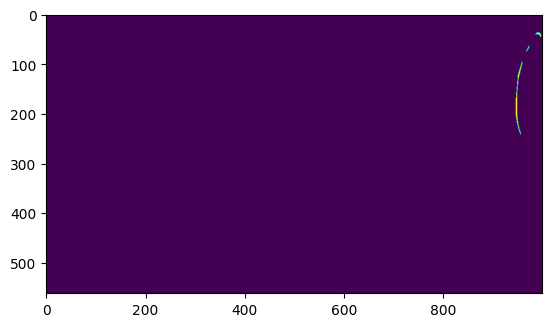

In [103]:
from matplotlib import pyplot as plt
plt.imshow(target["masks"].squeeze())

In [104]:
target

{'boxes': (tensor([[946.5000,  36.5000, 998.5000, 244.5000]]),),
 'labels': array([1]),
 'labels_names': array(['person'], dtype='<U6'),
 'image_id': (tensor([4641]),),
 'image_name': '/content/DATA/images/frame-2021-07-14-12-39-19.512012.png',
 'area': (tensor([420.]),),
 'masks': tensor([[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8)}